In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from joblib import dump,load

In [2]:
Combined_Data = pd.read_csv("../Resources/Combined_Data.csv")
df = pd.read_csv("../Resources/Combined_Data.csv")

df_2024 = pd.read_csv("../Resources/Cleaned_2024.csv")

Combined_Data.drop('Tm', axis=1, inplace=True)

df_2024.drop("Unnamed: 0", axis=1, inplace=True)
df_2024 = df_2024.drop([30, 31])

In [3]:
corr_data = Combined_Data.corr()['playoffs']

low_corr_df = pd.DataFrame(corr_data.loc[(corr_data <= 0.1) & (corr_data >= -0.1)])
low_corr_df.rename(columns={'playoffs': 'correlation'}, inplace=True)

index_values = low_corr_df.index.tolist()[:-1]

index_values

['BK', 'CG_y', 'Ch', 'GF', 'SB', 'cSho']

In [4]:
columns_to_keep = index_values + ['playoffs']

focused_df = Combined_Data[columns_to_keep]
df_2024_focused = Combined_Data[columns_to_keep]

focused_df

,BK,CG_y,Ch,GF,SB,cSho,playoffs
0,5.0,2.0,6150.0,160.0,79.0,1.0,0
1,8.0,2.0,5889.0,160.0,90.0,1.0,1
2,8.0,2.0,5934.0,160.0,81.0,0.0,0
3,3.0,2.0,5819.0,160.0,125.0,0.0,1
4,3.0,1.0,6208.0,162.0,66.0,0.0,1
...,...,...,...,...,...,...,...
145,7.0,0.0,5944.0,162.0,101.0,0.0,0
146,1.0,0.0,5802.0,162.0,160.0,0.0,1
147,4.0,3.0,5789.0,159.0,79.0,1.0,1
148,12.0,1.0,5733.0,161.0,99.0,1.0,1


In [5]:
y = focused_df["playoffs"]
X = focused_df.drop(columns="playoffs")

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
#                                                     random_state=1, 
                                                    stratify=y)
X_train.shape

(112, 6)

In [7]:
classifier = LogisticRegression(solver='liblinear',
                                max_iter=1000,
                                # random_state=1
                               )
classifier

LogisticRegression(max_iter=1000, solver='liblinear')

In [8]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [9]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6339285714285714
Testing Data Score: 0.6578947368421053


In [10]:
dump(classifier, 'log_model.joblib')

['log_model.joblib']

In [11]:
model = load('log_model.joblib')

In [12]:
predictions_2024 = model.predict(df_2024[index_values])
predictions_2024

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1])

In [13]:
df_2024['predictions'] = predictions_2024
predicted_2024 = df_2024[["Tm", "predictions"]]

predicted_2024

,Tm,predictions
0,Arizona Diamondbacks,0
1,Atlanta Braves,0
2,Baltimore Orioles,0
3,Boston Red Sox,0
4,Chicago Cubs,0
5,Chicago White Sox,0
6,Cincinnati Reds,1
7,Cleveland Guardians,0
8,Colorado Rockies,0
9,Detroit Tigers,0


In [14]:
# Make list for all the predictions
predictions = {}

# Create loop for it to run 100 times with the model
iterations = 100
for i in range(iterations):
    y = focused_df["playoffs"]
    X = focused_df.drop(columns="playoffs")
    X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)
    classifier = LogisticRegression(solver='liblinear', max_iter=1000)
    classifier.fit(X_train, y_train)
    dump(classifier, 'log_model.joblib')
    model = load('log_model.joblib')
    predictions_2024 = model.predict(df_2024[index_values])
    predictions_df = pd.DataFrame({"Team": df_2024["Tm"], "Prediction": predictions_2024})
    counts = predictions_df.groupby('Team')['Prediction'].sum().astype(int)
    
    for team, count in counts.items():
        if team in predictions:
            predictions[team] += count
        else:
            predictions[team] = count

predictions

{'Arizona Diamondbacks': 0,
 'Atlanta Braves': 1,
 'Baltimore Orioles': 0,
 'Boston Red Sox': 21,
 'Chicago Cubs': 0,
 'Chicago White Sox': 14,
 'Cincinnati Reds': 65,
 'Cleveland Guardians': 3,
 'Colorado Rockies': 1,
 'Detroit Tigers': 0,
 'Houston Astros': 7,
 'Kansas City Royals': 12,
 'Los Angeles Angels': 12,
 'Los Angeles Dodgers': 0,
 'Miami Marlins': 0,
 'Milwaukee Brewers': 39,
 'Minnesota Twins': 14,
 'New York Mets': 0,
 'New York Yankees': 11,
 'Oakland Athletics': 0,
 'Philadelphia Phillies': 28,
 'Pittsburgh Pirates': 0,
 'San Diego Padres': 9,
 'San Francisco Giants': 0,
 'Seattle Mariners': 0,
 'St. Louis Cardinals': 0,
 'Tampa Bay Rays': 22,
 'Texas Rangers': 0,
 'Toronto Blue Jays': 5,
 'Washington Nationals': 41}

In [15]:
# Sort the teams based on prediction counts in descending order
sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)

# Select the top 12 teams
top_12_teams = sorted_predictions[:12]

# Print or use the top 12 teams
#print(top_12_teams)
top_12_teams

[('Cincinnati Reds', 65),
 ('Washington Nationals', 41),
 ('Milwaukee Brewers', 39),
 ('Philadelphia Phillies', 28),
 ('Tampa Bay Rays', 22),
 ('Boston Red Sox', 21),
 ('Chicago White Sox', 14),
 ('Minnesota Twins', 14),
 ('Kansas City Royals', 12),
 ('Los Angeles Angels', 12),
 ('New York Yankees', 11),
 ('San Diego Padres', 9)]

In [39]:
# Sort the teams based on prediction counts in descending order
sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)

# Select the top 12 teams
bottom_12_teams = sorted_predictions[18:30]

# Print or use the top 12 teams
#print(top_12_teams)
bottom_12_teams

[('Baltimore Orioles', 0),
 ('Chicago Cubs', 0),
 ('Detroit Tigers', 0),
 ('Los Angeles Dodgers', 0),
 ('Miami Marlins', 0),
 ('New York Mets', 0),
 ('Oakland Athletics', 0),
 ('Pittsburgh Pirates', 0),
 ('San Francisco Giants', 0),
 ('Seattle Mariners', 0),
 ('St. Louis Cardinals', 0),
 ('Texas Rangers', 0)]

In [44]:
# Assuming top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "BK" value
bk_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['BK']

# Sort the DataFrame by 'BK' values in ascending order
sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'BK']].sort_values('BK', ascending=True)
total_bk = bk_values.sum()

# Print the sorted DataFrame
print(sorted_df)
print("Total BK values:", total_bk)

                       Tm  BK
3          Boston Red Sox   0
6         Cincinnati Reds   1
11     Kansas City Royals   1
26         Tampa Bay Rays   1
16        Minnesota Twins   2
20  Philadelphia Phillies   3
22       San Diego Padres   3
29   Washington Nationals   3
15      Milwaukee Brewers   4
5       Chicago White Sox   5
12     Los Angeles Angels   6
18       New York Yankees   8
Total BK values: 37


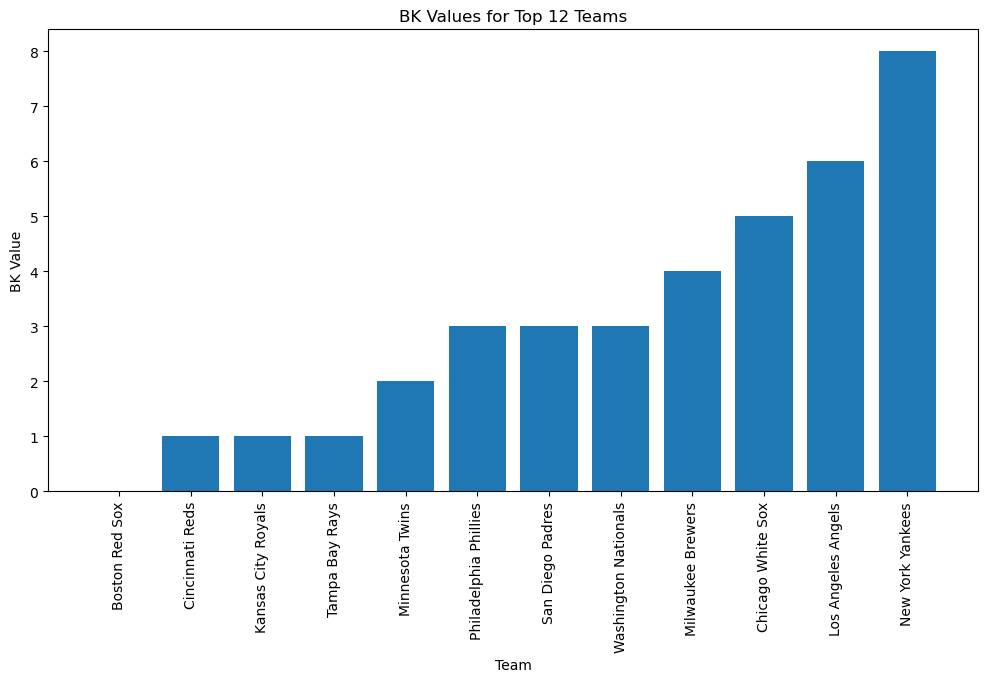

In [33]:
# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Tm'], sorted_df['BK'])
plt.xlabel('Team')
plt.ylabel('BK Value')
plt.title('BK Values for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [43]:
# Assuming top_12_teams contains the team names of the top 12 teams
bottom_12_teams_names = [team[0] for team in bottom_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "BK" value
bk_values = df_2024[df_2024['Tm'].isin(bottom_12_teams_names)]['BK']

# Sort the DataFrame by 'BK' values in ascending order
sorted_df = df_2024[df_2024['Tm'].isin(bottom_12_teams_names)][['Tm', 'BK']].sort_values('BK', ascending=True)
total_bk = bk_values.sum()
# Print the sorted DataFrame
print(sorted_df)
print("Total BK values:", total_bk)

                      Tm  BK
25   St. Louis Cardinals   1
2      Baltimore Orioles   2
4           Chicago Cubs   2
13   Los Angeles Dodgers   2
23      Seattle Mariners   2
27         Texas Rangers   2
9         Detroit Tigers   3
14         Miami Marlins   3
24  San Francisco Giants   3
17         New York Mets   4
21    Pittsburgh Pirates   4
19     Oakland Athletics   5
Total BK values: 33


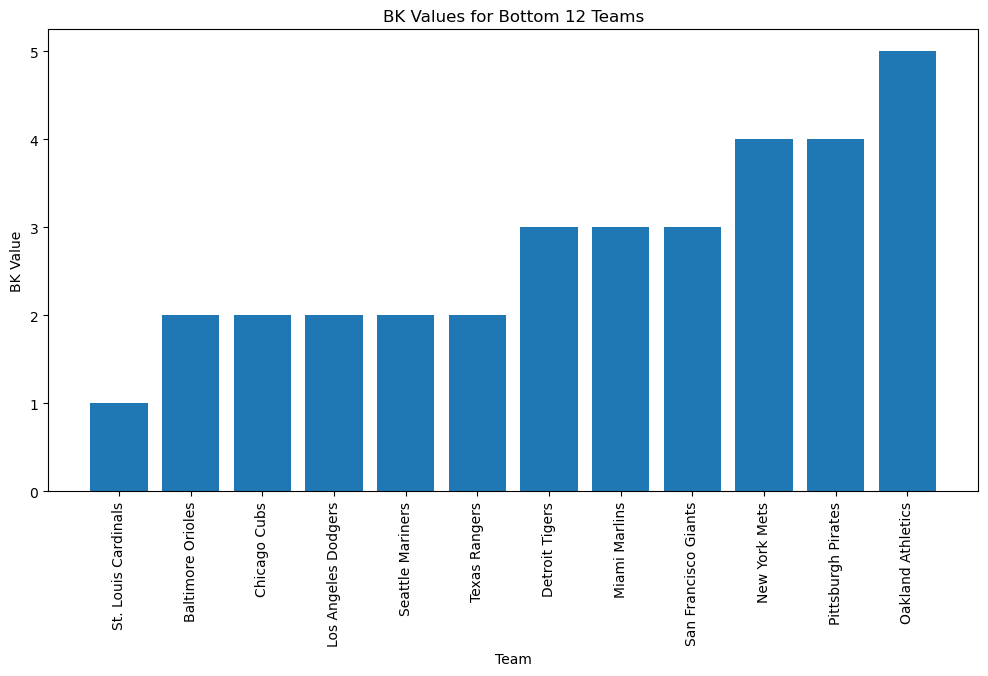

In [42]:
# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Tm'], sorted_df['BK'])
plt.xlabel('Team')
plt.ylabel('BK Value')
plt.title('BK Values for Bottom 12 Teams')
plt.xticks(rotation=90)
plt.show()

In [34]:
# Assuming top_12_teams contains the team names of the top 12 teams
top_12_teams_names = [team[0] for team in top_12_teams]

# Filter the df_2024 DataFrame for the top 12 teams and retrieve the "BK" value
SB_values = df_2024[df_2024['Tm'].isin(top_12_teams_names)]['SB']

# Sort the DataFrame by 'BK' values in ascending order
SB_sorted_df = df_2024[df_2024['Tm'].isin(top_12_teams_names)][['Tm', 'SB']].sort_values('SB', ascending=True)

# Print the sorted DataFrame
print(SB_sorted_df)

                       Tm  SB
16        Minnesota Twins  34
18       New York Yankees  34
5       Chicago White Sox  42
22       San Diego Padres  56
3          Boston Red Sox  58
12     Los Angeles Angels  59
26         Tampa Bay Rays  63
11     Kansas City Royals  64
20  Philadelphia Phillies  72
15      Milwaukee Brewers  88
6         Cincinnati Reds  96
29   Washington Nationals  98


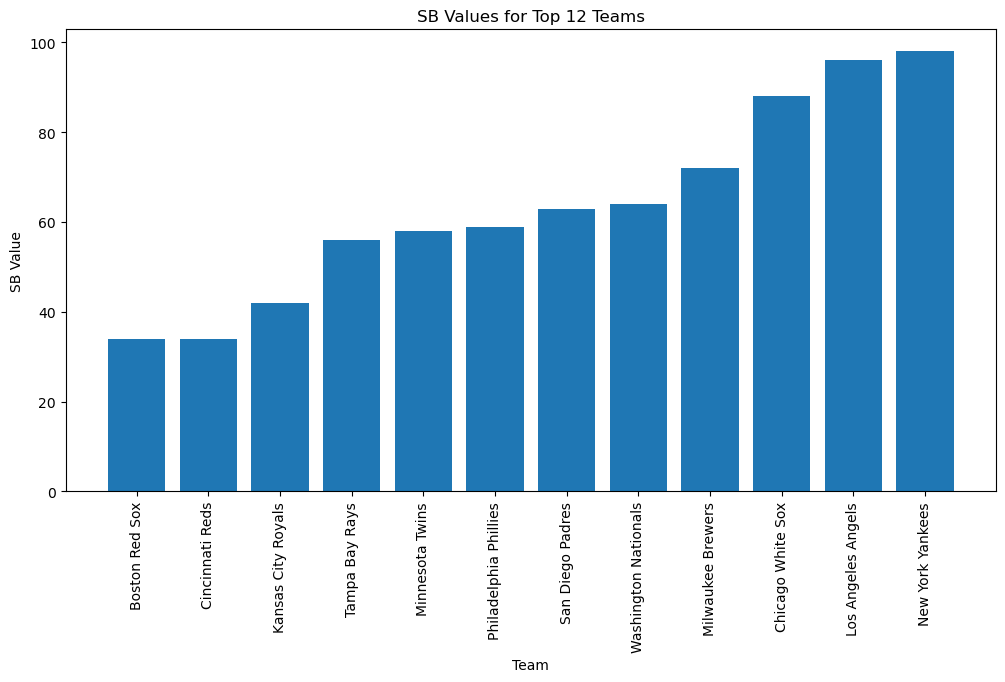

In [36]:
# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Tm'], SB_sorted_df['SB'])
plt.xlabel('Team')
plt.ylabel('SB Value')
plt.title('SB Values for Top 12 Teams')
plt.xticks(rotation=90)
plt.show()